
# Treinamento de Modelos de Regressão

Este notebook utiliza o arquivo **history_advanced.csv** para treinar os seguintes modelos:
- Regressão Linear
- Árvore de Decisão
- Gradient Boosting
- Rede Neural (MLP)

**Observação:** Assume-se que a **última coluna do CSV é a variável alvo (y)** e as demais são variáveis de entrada (X).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
df = pd.read_csv("history_advanced_complete.csv")
df = df.drop(columns=['Individual_ID', 'Generation'])

df.head()

,Fitness,Gene_0_0,Gene_0_1,Gene_0_2,Gene_0_3,Gene_0_4,Gene_0_5,Gene_0_6,Gene_0_7,Gene_0_8,...,Gene_19_10,Gene_19_11,Gene_19_12,Gene_19_13,Gene_19_14,Gene_19_15,Gene_19_16,Gene_19_17,Gene_19_18,Gene_19_19
0,0.036099,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.009070,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Estatísticas Descritivas da Variável Alvo (GenerationBestFitness):
count    100100.000000
mean          0.116297
std           0.006418
min           0.000000
25%           0.115412
50%           0.117036
75%           0.117949
max           0.122061
Name: Fitness, dtype: float64


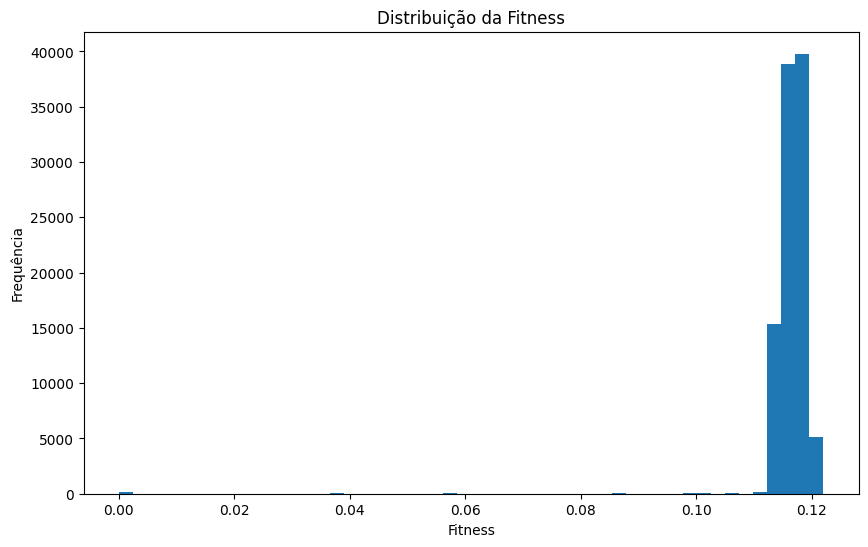

In [3]:
print("Estatísticas Descritivas da Variável Alvo (GenerationBestFitness):")
print(df['Fitness'].describe())

plt.figure(figsize=(10, 6))
df['Fitness'].hist(bins=50)
plt.title('Distribuição da Fitness')
plt.xlabel('Fitness')
plt.ylabel('Frequência')
plt.grid(False)
plt.show()

In [4]:
X = df.drop(columns=['Fitness'])
X.head()

,Gene_0_0,Gene_0_1,Gene_0_2,Gene_0_3,Gene_0_4,Gene_0_5,Gene_0_6,Gene_0_7,Gene_0_8,Gene_0_9,...,Gene_19_10,Gene_19_11,Gene_19_12,Gene_19_13,Gene_19_14,Gene_19_15,Gene_19_16,Gene_19_17,Gene_19_18,Gene_19_19
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
y = df['Fitness']
y.head()

0    0.036099
1    0.000000
2    0.009070
3    0.000000
4    0.000000
Name: Fitness, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [27]:
def evaluate_and_plot(model_name, y_true, y_pred):
    """Calcula métricas de regressão, plota valores reais vs. preditos e gráficos de resíduos."""
    
    # Cálculo das Métricas
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Impressão das Métricas
    print(f"--- {model_name} Métricas ---")
    print(f"MSE: {mse:.6e}")
    print(f"RMSE: {rmse:.6e}")
    print(f"MAE: {mae:.6e}")
    print(f"R2: {r2:.4f}")
    
    # Cálculo dos Resíduos
    residuals = y_true - y_pred

    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Cria dois subplots
    
    axes[0].scatter(y_true, y_pred, alpha=0.5, label='Predição')
    
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', label='Predição Perfeita (y=x)')
    
    axes[0].set_title(f'1. Valores Reais vs. Preditos ({model_name})')
    axes[0].set_xlabel('Valor Real (y_test)')
    axes[0].set_ylabel('Valor Predito (y_pred)')
    axes[0].legend()
    axes[0].grid(True, linestyle='--')
    
    # 2. Gráfico de Resíduos (Resíduos vs. Valores Preditos)
    axes[1].scatter(y_pred, residuals, alpha=0.5)
    axes[1].hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linestyle='--') # Linha de Resíduo Zero
    
    axes[1].set_title(f'2. Gráfico de Resíduos ({model_name})')
    axes[1].set_xlabel('Valor Predito (y_pred)')
    axes[1].set_ylabel('Resíduos (Real - Predito)')
    axes[1].grid(True, linestyle='--')
    
    plt.tight_layout()
    plt.show()

## Regressão Linear

--- Regressão Linear Métricas ---
MSE: 3.244268e-06
RMSE: 1.801185e-03
MAE: 1.428885e-03
R2: 0.9132


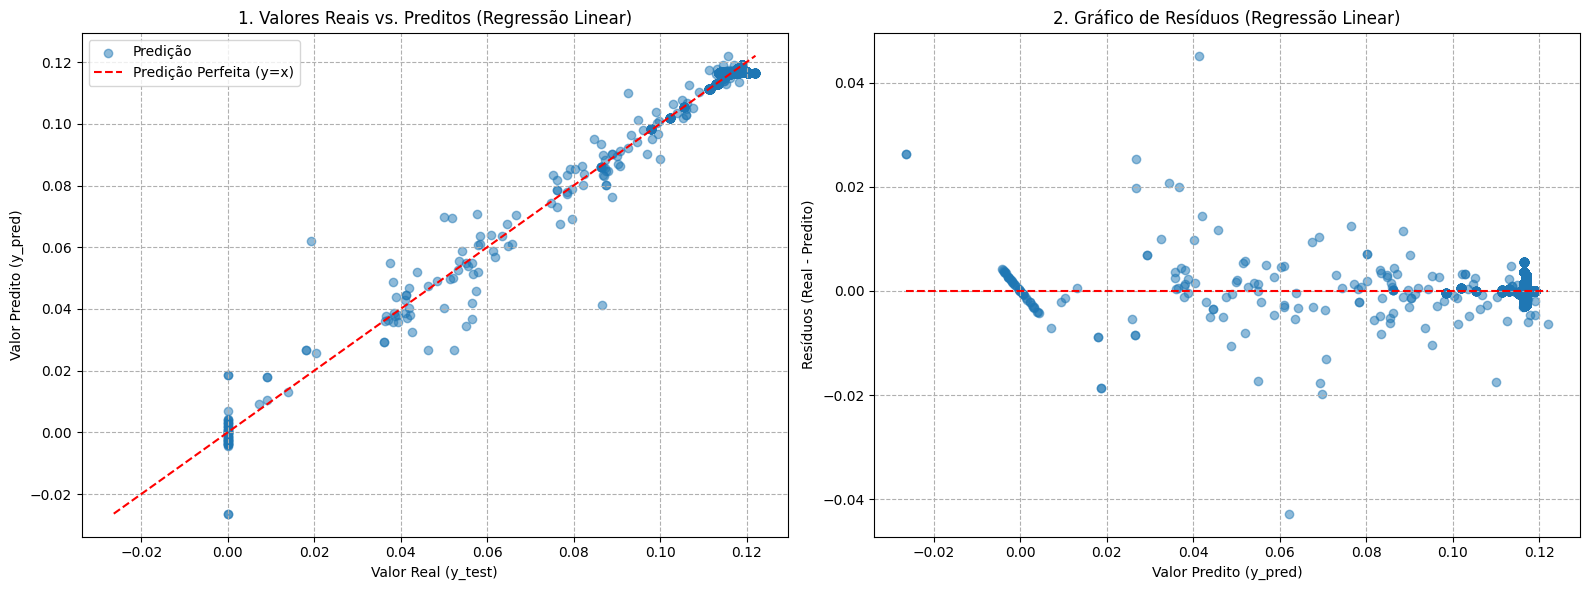

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

evaluate_and_plot("Regressão Linear", y_test, y_pred_lr)

## Árvore de Decisão

--- Árvore de Decisão Métricas ---
MSE: 2.923671e-06
RMSE: 1.709875e-03
MAE: 1.407476e-03
R2: 0.9217
Precisão do Modelo: 92.17%


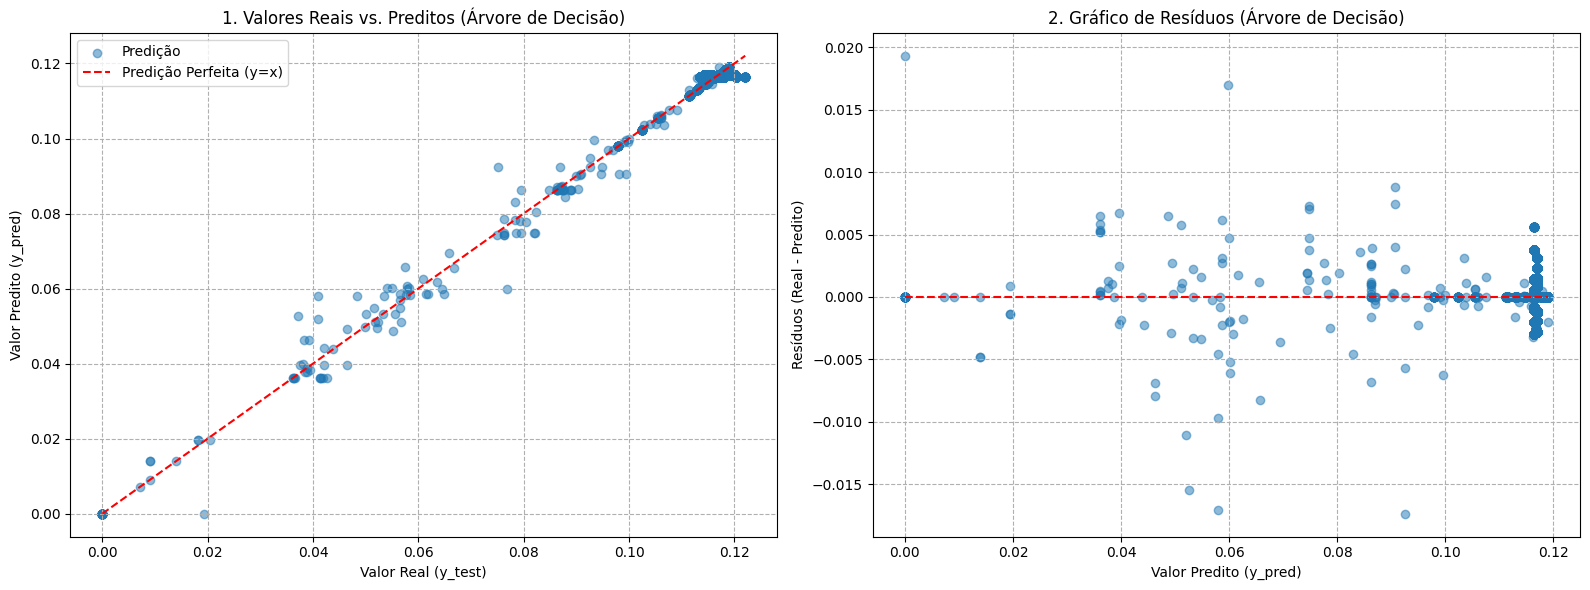

In [9]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

evaluate_and_plot("Árvore de Decisão", y_test, y_pred_dt)

## Gradient Boosting

--- Gradient Boosting Métricas ---
MSE: 3.003549e-06
RMSE: 1.733075e-03
MAE: 1.431832e-03
R2: 0.9196
Precisão do Modelo: 91.96%


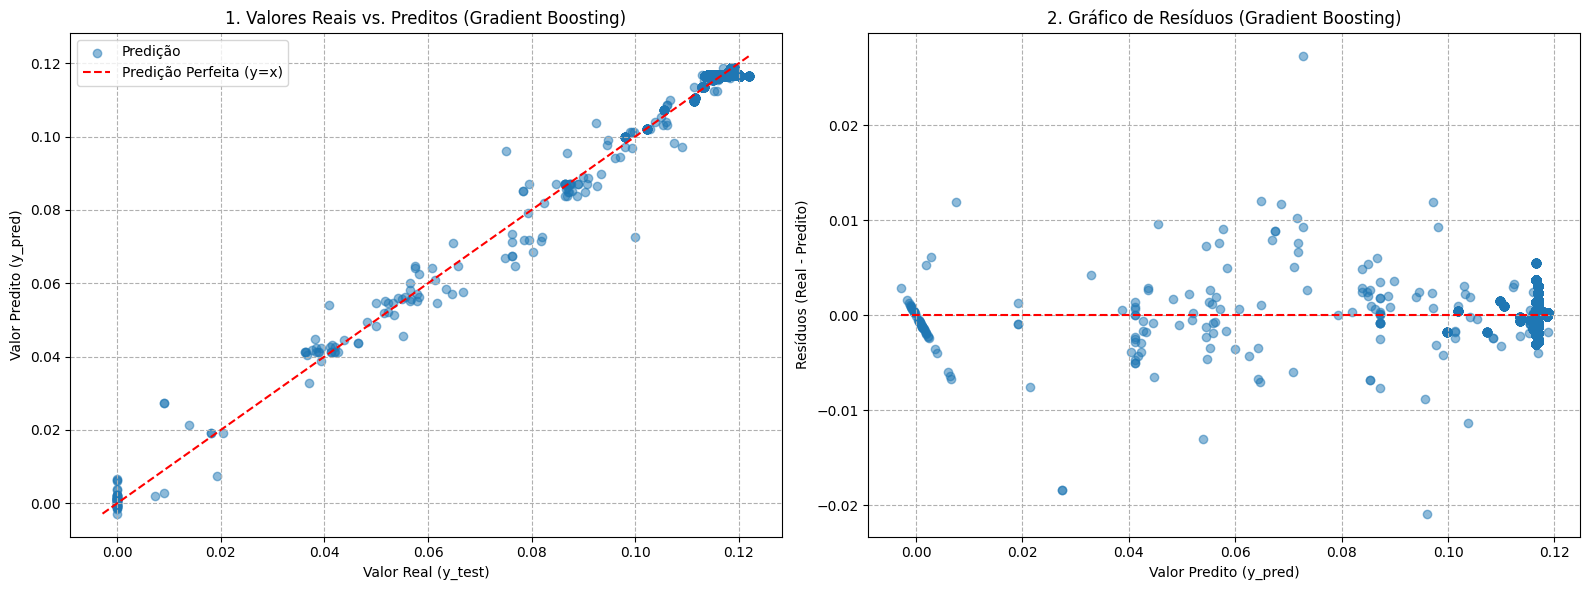

In [10]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

evaluate_and_plot("Gradient Boosting", y_test, y_pred_gb)

## Rede Neural (MLP)

--- Rede Neural (MLP) Métricas ---
MSE: 4.965249e-06
RMSE: 2.228284e-03
MAE: 1.545953e-03
R2: 0.8671
Precisão do Modelo: 86.71%


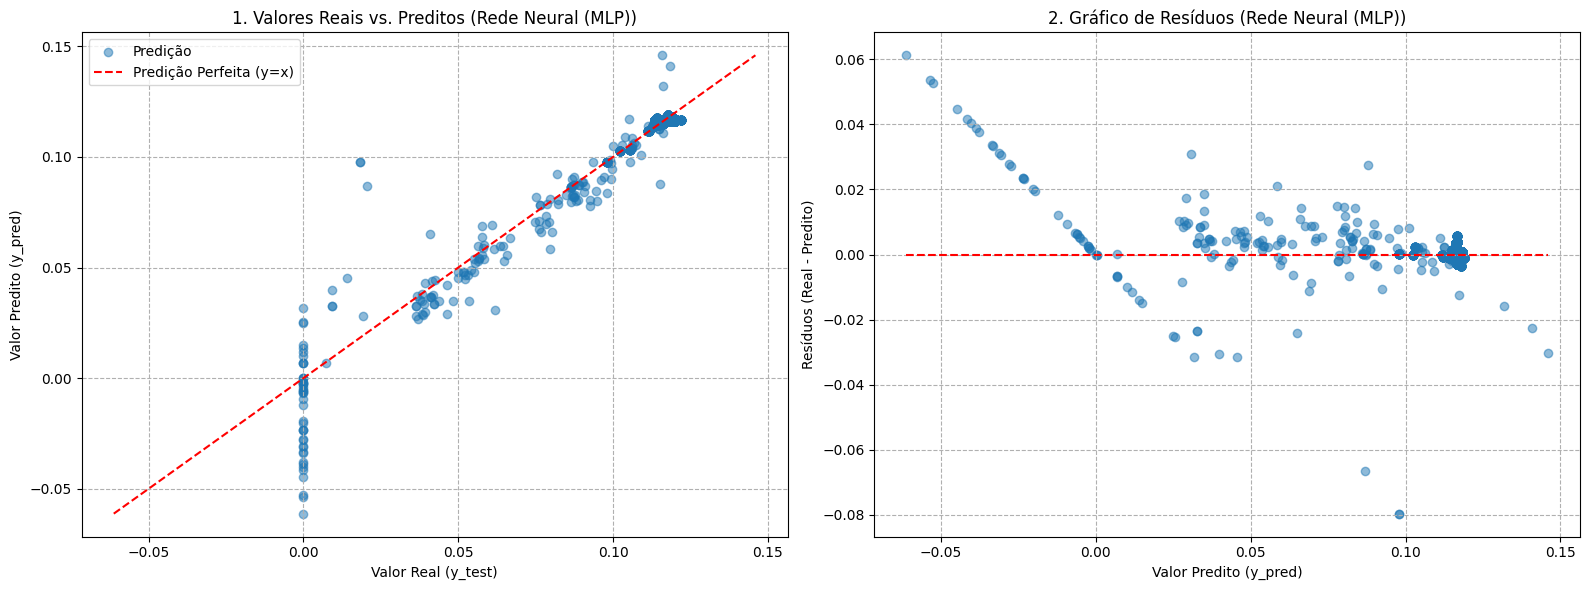

In [11]:
mlp = MLPRegressor(
    hidden_layer_sizes=(len(X.columns), len(X.columns)*2),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

evaluate_and_plot("Rede Neural (MLP)", y_test, y_pred_mlp)